In [1]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio

In [2]:
class subbasin:
    def __init__(self, arr, start):
        self.arr = arr
        self.start = start
        
        self.minx = 0
        self.miny = 0
        self.maxx = self.arr.shape[0]-1
        self.maxy = self.arr.shape[1]-1
        
        self.visited = []
        self._count = 0
        self._history = []
        
        self.explore(start)
    
#     def neighbours(self, index):
#         """Get the neighbours of an index along with the neighbouring pixel values that flow into it
#         """
#         x, y = index
#         res = []
#         flowing_pixels = []
        
#         who_flows = [4, 5, 6, 3, 0, 7, 2, 1, 8]
#         who_flows_counter = 0
        
#         for i in [x-1, x, x+1]:
#             for j in [y-1, y, y+1]:
#                 if ((i, j) != (x, y)) & (i >=self.minx) & (j>=self.miny) & (i<=self.maxx) & (j<=self.maxy):
#                     res.append((i, j))
#                     flowing_pixels.append(who_flows[who_flows_counter])
#                 who_flows_counter += 1
                
#         return res, flowing_pixels
    
    def flowing_neighbours(self, index):
        """Not tested, but I *think* this is faster than the previous one - Less list append calls. 
        """
        x, y = index
        res = []
#         flowing_pixels = []
        
        who_flows = [4, 5, 6, 3, 0, 7, 2, 1, 8]
        who_flows_counter = 0
        
        for i in [x-1, x, x+1]:
            for j in [y-1, y, y+1]:
                if ((i, j) != (x, y)) & (i >=self.minx) & (j>=self.miny) & (i<=self.maxx) & (j<=self.maxy):
                    if who_flows[who_flows_counter]==self.arr[i, j]:
                        res.append((i, j))
                    #flowing_pixels.append(who_flows[who_flows_counter])
                who_flows_counter += 1
                
        return res#, flowing_pixels
    
    def explore(self, index):
#         neighbours, flowing_pixels = self.neighbours(index)
        neighbours = self.flowing_neighbours(index)
        self.visited.append(index)
        self._count += 1
        self._history.append(index)          
        
#         for n, flowing_pix in zip(neighbours, flowing_pixels):
        for n in neighbours:
            if n not in self.visited:
                self.explore(n)
    
    @property
    def count(self):
        return self._count
    
    @property
    def history(self):
        return self._history

In [3]:
# np.random.seed(1)
# arr = np.random.randint(0, 10, (5, 5))
# arr

arr = np.array(
    [[0, 7, 7, 7, 7],
     [0, 1, 1, 3, 5],
     [0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0]]
)
arr

array([[0, 7, 7, 7, 7],
       [0, 1, 1, 3, 5],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

In [4]:
sb = subbasin(arr, (0,0))
sb.count
# print(*sb.neighbours((0, 3)), sep='\n')

7

In [5]:
arr[0, 1]

7

## OK! It works for dummy data, will it work for depressionless DEM?

In [6]:
dem_path = '../data_nongit/flow_dir_test_grid_cell_vic.tif'
dem_rast = rasterio.open(dem_path)

# Reading as numpy raster and removing no-data edges
dem_np = dem_rast.read(1)[0:-1, 1:]

# mapping direction values from D8 to VIC standard
dem_vic = np.copy(dem_np)
# flow_map = {1:3, 2:4, 4:5, 8:6, 16:7, 32:8, 64:1, 128:2}
# for k in flow_map.keys(): 
#     dem_vic[dem_np==k] = flow_map[k]
dem_vic

array([[1, 8, 2, ..., 6, 5, 5],
       [8, 2, 3, ..., 5, 5, 5],
       [4, 4, 5, ..., 5, 5, 5],
       ...,
       [2, 1, 8, ..., 6, 5, 5],
       [1, 8, 8, ..., 6, 6, 6],
       [8, 8, 1, ..., 6, 5, 6]], dtype=uint8)

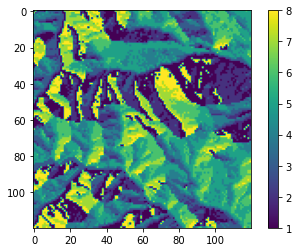

In [7]:
plt.imshow(dem_vic, cmap='viridis')
plt.colorbar()

In [8]:
# find the indices of the pixels that point outwards
# # for left edge: 8, 7, 6
# left_pour = [(0, y) for y in np.where(dem_vic[:, 0] == 7)[1]]  # indices of pixels in left edge that flow outwards
# left_pour

# TODO Similarly for other edges - simplify and automate the process
left = [(0, y) for y in np.where((dem_vic[:, 0] == 7)|(dem_vic[:, 0] == 6)|(dem_vic[:, 0] == 8))[0]]
left

[(0, 1),
 (0, 18),
 (0, 19),
 (0, 20),
 (0, 21),
 (0, 22),
 (0, 24),
 (0, 25),
 (0, 26),
 (0, 27),
 (0, 28),
 (0, 55),
 (0, 56),
 (0, 57),
 (0, 58),
 (0, 65),
 (0, 95),
 (0, 96),
 (0, 97),
 (0, 98),
 (0, 99),
 (0, 119)]

In [9]:
# subbasin(dem_vic, (0, )).count
for p in left:
    print(f"{p} -> {subbasin(dem_vic, p).count}")

(0, 1) -> 1
(0, 18) -> 2
(0, 19) -> 1
(0, 20) -> 1
(0, 21) -> 1
(0, 22) -> 7
(0, 24) -> 3
(0, 25) -> 1
(0, 26) -> 5
(0, 27) -> 1
(0, 28) -> 3
(0, 55) -> 1
(0, 56) -> 1
(0, 57) -> 1
(0, 58) -> 1
(0, 65) -> 1
(0, 95) -> 2
(0, 96) -> 1
(0, 97) -> 1
(0, 98) -> 1
(0, 99) -> 1
(0, 119) -> 1


In [10]:
dem_vic.shape

(120, 120)

In [11]:
down = [(dem_vic.shape[1]-1, x) for x in np.where((dem_vic[-1, :] == 6)|(dem_vic[-1, :] == 5)|(dem_vic[-1, :] == 4))[0]]
down
right = [(y, dem_vic.shape[0]-1) for y in np.where((dem_vic[:, -1] == 2)|(dem_vic[:, -1] == 3)|(dem_vic[:, -1] == 4))[0]]
left = [(0, y) for y in np.where((dem_vic[:, 0] == 7)|(dem_vic[:, 0] == 6)|(dem_vic[:, 0] == 8))[0]]
up = [(x, 0) for x in np.where((dem_vic[0, :] == 8)|(dem_vic[0, :] == 1)|(dem_vic[0, :] == 2))[0]]

In [12]:
res = {}

for p in down + right + left + up:
    res[p] = subbasin(dem_vic, p).history

In [13]:
subbasins = np.zeros_like(dem_vic).astype(np.float32)

i = 1
for pourpoint in res.keys():
    sb = res[pourpoint]
    # subbasins = np.put(subbasins)
    for ind in sb:
        subbasins[ind] = i
    i += 1
subbasins

array([[93., 71.,  0., ..., 32., 32., 92.],
       [94.,  0.,  0., ..., 32., 32., 32.],
       [95.,  0.,  0., ..., 32., 32., 32.],
       ...,
       [15., 15., 15., ..., 28., 29., 30.],
       [15., 15., 15., ..., 28., 29., 30.],
       [ 0., 15., 15., ..., 29., 30., 31.]], dtype=float32)

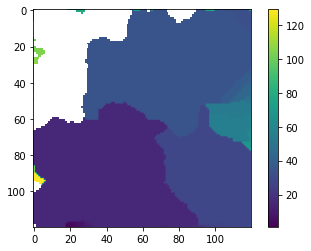

In [14]:
subbasins[subbasins==0] = np.nan
plt.imshow(subbasins)
plt.colorbar()

# Checked manually, the NW area should not be 0. Something is wrong in the algorithm.